In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Paths to the prepped data files
base_path = 'data/prepped_data/'
X_train_path = base_path + 'X_train.csv'
X_test_path = base_path + 'X_test.csv'
y_train_path = base_path + 'y_train.csv'
y_test_path = base_path + 'y_test.csv'

# Loading the datasets
X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train_df = pd.read_csv(y_train_path)
y_test_df = pd.read_csv(y_test_path)

# Convert to Series
y_train = y_train_df.iloc[:, 0] if y_train_df.shape[1] == 1 else y_train_df
y_test = y_test_df.iloc[:, 0] if y_test_df.shape[1] == 1 else y_test_df

# we want to use MinMaxScaler
scaler = MinMaxScaler()

# Scale 'X' features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale 'y' if necessary
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()


Feature ranking:
1. feature open (0.9998799749500539)
2. feature rsi (3.623932062375953e-05)
3. feature sma_30 (2.6130401117824742e-05)
4. feature volume (1.9410482139797242e-05)
5. feature macd (7.0240884764044645e-06)
6. feature hour (3.5406537222467427e-06)
7. feature gld_close (3.137456991741078e-06)
8. feature gld_volume (2.6552909363715433e-06)
9. feature day (2.6251373029479096e-06)
10. feature spy_volume (2.5820544371571183e-06)
11. feature spy_close (2.5608126796252544e-06)
12. feature dia_close (2.4463814240243513e-06)
13. feature dia_volume (2.4169487471902334e-06)
14. feature value (2.288656460765665e-06)
15. feature treasury_yield_daily (2.0076928421386457e-06)
16. feature durables_monthly (7.519309604652508e-07)
17. feature retail_sales_monthly (7.060262987734743e-07)
18. feature federal_funds_rate_daily (6.920313012579856e-07)
19. feature month (4.751939774096016e-07)
20. feature unemployment_monthly (4.524394505403155e-07)
21. feature classification_numerical (3.8085348

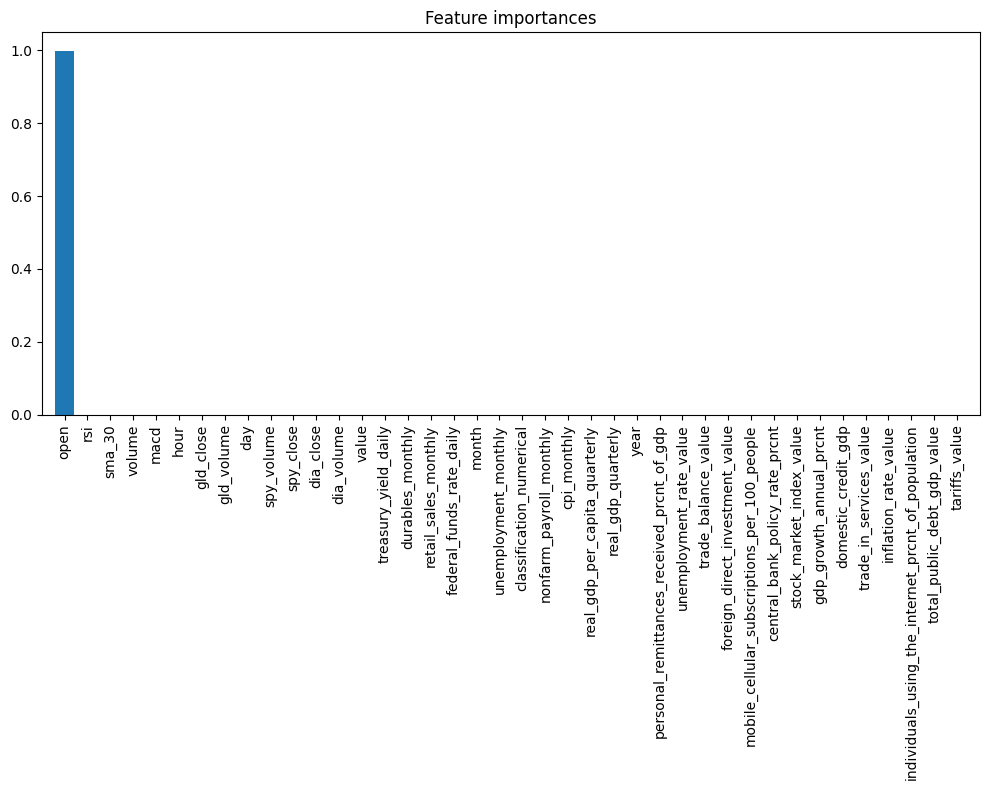

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import os

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Extract and sort the feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()

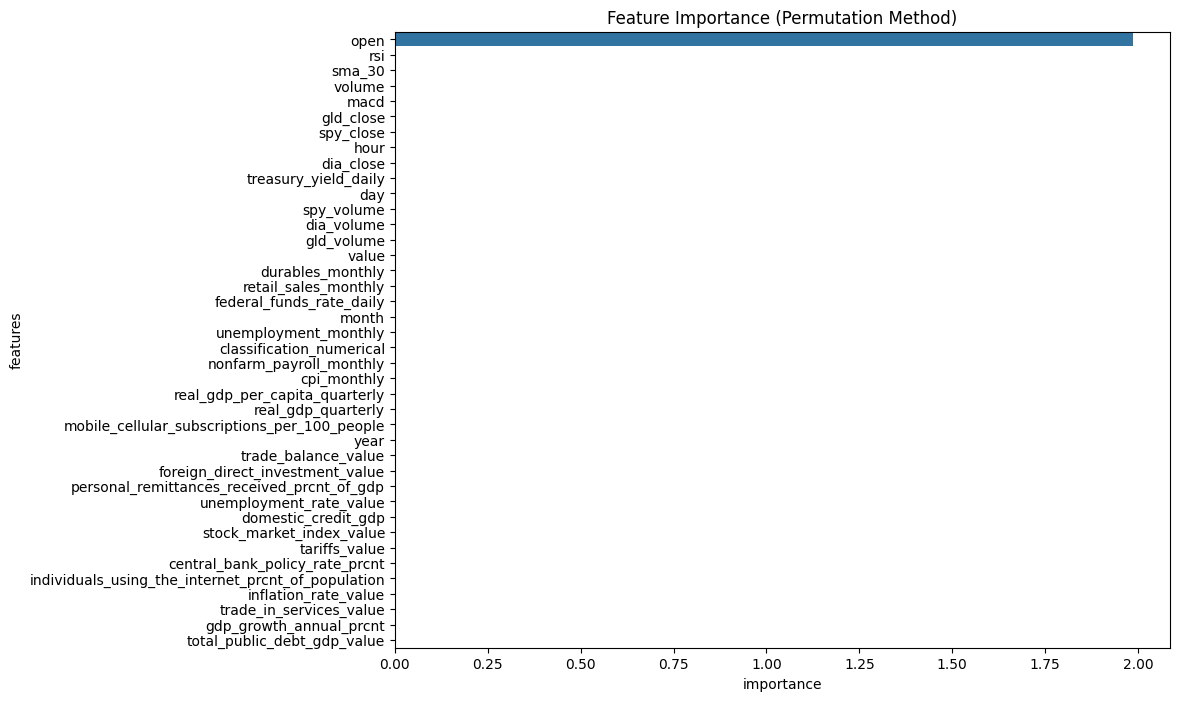

In [3]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
results = permutation_importance(model, X_train_scaled, y_train_scaled, n_repeats=10, random_state=42, n_jobs=-1)

# Get the importance scores
importance_scores = results.importances_mean

# Map the scores to the feature names
feature_importances_perm = pd.DataFrame({'features': X_train.columns, 'importance': importance_scores})
feature_importances_perm.sort_values(by='importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='features', data=feature_importances_perm)
plt.title('Feature Importance (Permutation Method)')
plt.show()

In [4]:
# SHAP

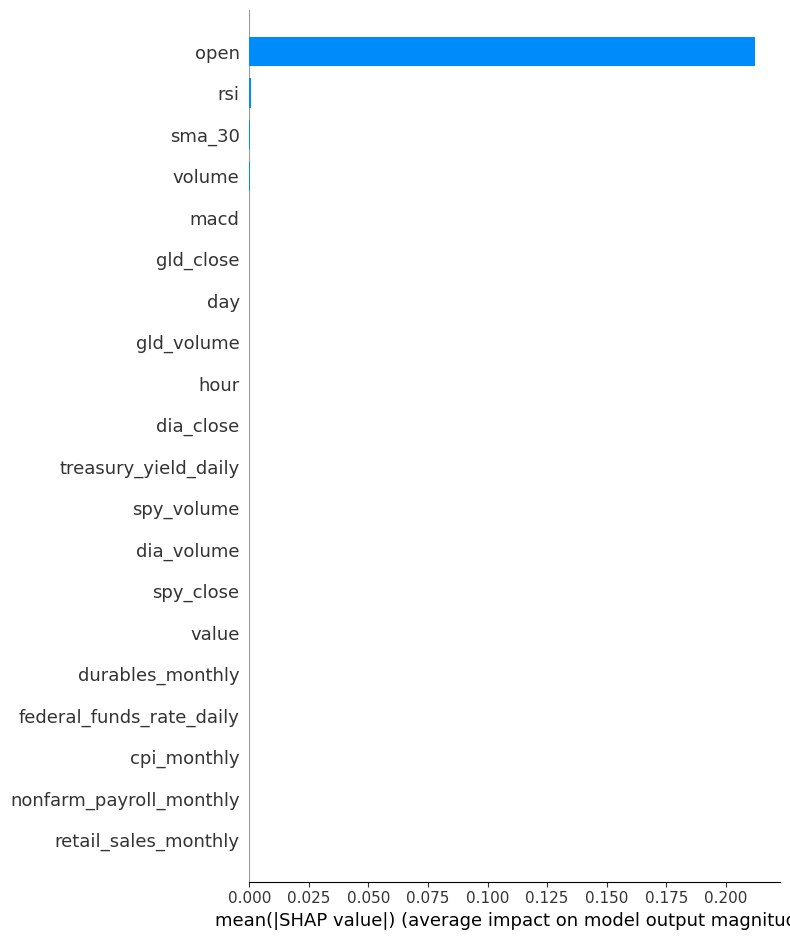

In [7]:
import shap

# Initialize the SHAP explainer (tree explainer is efficient for tree-based models)
explainer = shap.TreeExplainer(model)

X_sample = shap.sample(X_train_scaled, 100)  # Adjust the sample size as needed
shap_values = explainer.shap_values(X_sample)


# Summarize the effects of all the features
shap.summary_plot(shap_values, X_train, plot_type="bar")

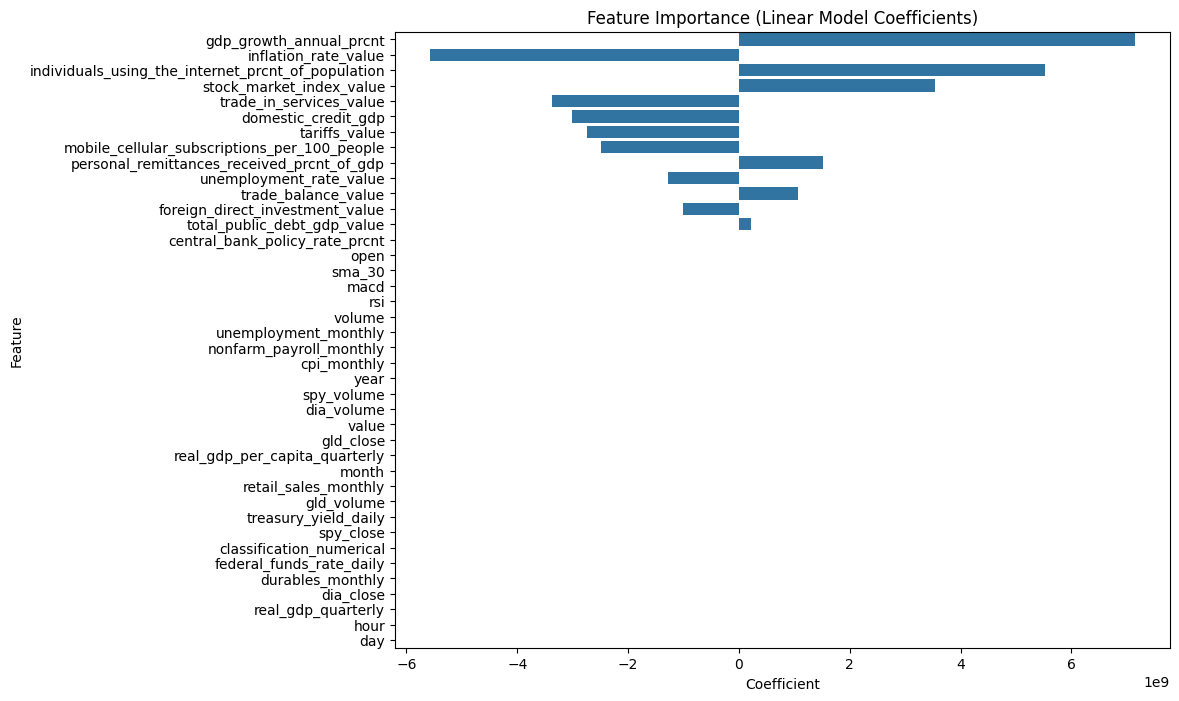

In [6]:
from sklearn.linear_model import LinearRegression

# Fit a linear model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

# Coefficients as feature importance
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linear_model.coef_})
coefficients.sort_values(by='Coefficient', key=abs, ascending=False, inplace=True)  # Sorting by absolute value

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Linear Model Coefficients)')
plt.show()
